![](https://drive.google.com/uc?id=1LOH2NIuQ8HBr02W_V19HfUeTHMNclg0w)





## Agenda for the Day
***
- Basic Probability
- Conditional Probability
- Bayes Theorem
- Random Variable
- Probability Distributions
- Normal Distribution

## Big Picture of Probability

* Model Uncertanity - Real-world is filled with uncertainty - you cannot predict how certain events will turn out. It is very important for a data scientist to model uncertainty.
* Probability gives us tools for dealing with life’s uncertainties.
* While we cannot predict events accurately, we can form an idea of how likely the events will or will not occur. 
* Probability can even help us maximize your winnings on game shows (as
we will later see in the Monty Hall Puzzle.)

## An example
* Businesses facing uncertainty have always sought to quantify their risks. 
* Insurance officials describe their business as the “transfer of risk”.

Insurance companies are in the business of knowing things that might otherwise seem like random trivia: 
- Twenty to twenty-four-year-old drivers are the most likely to be
involved in a fatal crash.
- The most commonly stolen car in Illinois is the Honda Civic.
- Texting while driving causes crashes, but state laws banning the
practice do not seem to stop drivers from doing it. In fact, such laws
might even make things worse by prompting drivers to hide their
phones and therefore take their eyes off the road while texting.

## Basic Probability - Intuition
***

 - Let's start with a simple example: Say, we flip a fair coin
 
 - Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.
 
 - Therefore, we can say that the **Probability** of getting a *Heads* is 0.5. Similarly, Probability of getting a *Tails* is 0.5 
 
 - **Probability can roughly be described as "the percentage chance of an event or sequence of events occurring".**


## Basic Probability - Intuition

Some common terms thrown around are: 

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.



## Quiz: What is Experiment, Outcome & Event in the following examples?

* We roll a die and 4 appears.
* An Ace of Spade is drawn randomly from a deck of 52 cards. 
* Suppose we toss a coin twice, and we get a head (H) on the first toss and a tail (T) on the second toss. 


## Basic Probability - Easy Rules
***
These are a list of some comprehensive rules Probability must follow: 

 - The Probability that nothing occurs is 0 
 - The Probability that something occurs is 1
 - The probability of something is 1 minus the probability that the opposite occurs
 
 - The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities
 
 - **"Mutually exclusive"** is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time. 

## Basic Probability - Easy Rules
***
 - For any 2 events the probability that at least one occurs is the sum of their probabilities minus their intersection
 
## **In-class Activity** 
 
 - The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has *restless leg syndrome*. Does this imply that 13% of people will have at least one sleep problems of these sorts?

Answer: No, the events can simultaneously occur and so are not mutually exclusive. To elaborate: 
***
![](https://drive.google.com/uc?id=1dDxJ7IG1h3fkg5IYOTGIPg7RSWRdLWDK)

## Calculating probability 
***
- We have a dataset having details of the House Price in Brooklyn and certain other faetures.
- Lets check the Probability of picking a house in the Neighborood of "OldTown"

- This is nothing but: 
   - No. of houses in OldTown/Total no. of houses
   
- Let's go through this in Python

In [2]:
# import the modules

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read the data

data = pd.read_csv("/train1.csv")
data.head()

,Unnamed: 0,Id,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,GrLivArea,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SaleCondition,SalePrice
0,0,1,8450,CollgCr,1Fam,2Story,7,5,2003,GasA,1710,8,Attchd,2003.0,2,548,2008,Normal,208500
1,1,2,9600,Veenker,1Fam,1Story,6,8,1976,GasA,1262,6,Attchd,1976.0,2,460,2007,Normal,181500
2,2,3,11250,CollgCr,1Fam,2Story,7,5,2001,GasA,1786,6,Attchd,2001.0,2,608,2008,Normal,223500
3,3,4,9550,Crawfor,1Fam,2Story,7,5,1915,GasA,1717,7,Detchd,1998.0,3,642,2006,Abnorml,140000
4,4,5,14260,NoRidge,1Fam,2Story,8,5,2000,GasA,2198,9,Attchd,2000.0,3,836,2008,Normal,250000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# data.info()
# data['Neighborhood'].value_counts()

In [6]:
# Total number of houses
all_houses = data.shape[0]

# Number of houses in Old Town
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]

# Required probability
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Thus, from the output above we can state that: 

At random, the probability of choosing a house from the data set in the "OldTown" neighborhood is *0.077*

- Having found out the probability of picking a house from the "OldTown" neighborhood, let's go little further.


- Even though this would be pretty redundant, but when picking **1 by 1**, what would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood? 


- This is nothing but Conditional Probability!

- This might sound a little complicated at first but let's break it down by starting with an easy example! 

## Conditional Probability - Intuition (1/2)
***
Let's say that we're eating some M&Ms. 

 - There are 10 M&Ms left in the bag: 5 are green, and 5 are blue.
 
 - What is the probability of getting 3 blue candies in a row? 
     - The probability of getting the first blue candy is 5/10, or 1/2. 
     - When we pick a blue candy, though, we remove it from the bag. We're left with **9** candies in total with (5-1 =)4 Blue ones.
     - So the probability of getting another blue is 4/9. 
     - Similarly, the probability of picking a third blue candy is 3/8
     
     

## Conditional Probability - Intuition (2/2)
***
- Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

    - Our final probability is 1/2 \* 4/9 \* 3/8, or .0833. So, there is an 8.3% chance of picking three blue candies in a row.
    
    
- **Simple tricks**: Whenever you have to *verbally* say AND (like we just did above), you will want to **MULTIPLY** the probabilities


- Whenever you have to *verbally* say OR, you will want to **ADD** the probabilities. 
    

## In-class Activity - Can you solve this on your own? 
***
1) What is the probability of picking a green candy OR a blue candy?

2) Consider we have 7 green candies and 5 blue candies. What is the probability of picking (one by one, and without replacing) 2 green candies OR 2 blue candies? 



Answers : 

1) $(5/10)+(5/10)=1$

2) $(7/12)*(6/11)+(5/12)*(4/11)=(62/132)$


## Conditional Probability
***
To summarize, **Conditional probability is the probability of an  event A occurring, given that B has already occurred.**

- It is also denoted by:
***
![](https://drive.google.com/uc?id=15MH3QA7fIu2vNc_3h_r_iRDn3-cU0eXr)


## Conditional Probability
***
Coming back to calculating probability: 

 - What would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood?
 
 - Let's find this out in Python. 


In [7]:
## Enter condtional probability code
(houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1))

0.0059413935234303855

* What would be the the probability that the house has an Attached Garage Type, given that the house is in "OldTown" neighborhood?

In [10]:
# Probability that the house has an Attached Garage Type, given that the house is in "OldTown" neighborhood
print(data[data['Neighborhood']== "OldTown"]['GarageType'].value_counts())
data[data['Neighborhood']== "OldTown"]['GarageType'].value_counts()['Attchd']/len(data[data['Neighborhood']== "OldTown"])


Detchd     81
Attchd     17
CarPort     1
2Types      1
BuiltIn     1
Name: GarageType, dtype: int64


0.1504424778761062

## Independent Events
***

- Two events are independent, one event does not influence the probability of another event.
- Two events, A and B are independent if and only if  $P(A and B)=P(A)×P(B)$

Some examples of independent events:
- Owning a dog and growing your own herb garden.
- Paying off your mortgage early and owning a Chevy Cavalier.
- Winning the lottery and running out of milk.



## Quiz: Which of the below events Independent?

* Robbing a bank and going to Jail.
* Taking a cab home and finding your favorite movie on cable.
* Buying ten lottery tickets and winning the lottery. 
* Winning the lottery and running out of milk.

### Solution:-

* Robbing a bank and going to Jail. - Dependent
* Taking a cab home and finding your favorite movie on cable. - Independent
* Buying ten lottery tickets and winning the lottery. - Dependent
* Winning the lottery and running out of milk. - Independent

**Think:-** You flip a coin and roll a die. Let H be the event you flip a heads and let F be the event that you roll a 4. What is P(H ∣ F)?

Note: P(H ∣ F) denotes the probability of H occurring given that F occurs.

Explanation:- Because the events are clearly independent, P(H ∣ F)=P(H). That is, the event of the 4 being rolled does not change the probability that the heads is flipped!

## Dependent or Independent
***
![](https://drive.google.com/uc?id=1inUJxOx1tAcq_1F-4An8O54FydZMjMrt)

## Find it out yourself

A bag contains 5 red and 5 blue balls. We remove a random ball from the bag, record its colour and put it back into the bag. We then remove another random ball from the bag and record its colour.


### What is the probability that the first ball is red?


Since there are a total of 10 balls, of which 5 are red, the probability of getting a red ball is

<br>P(first ball red)=5/10=1/2


### What is the probability that the second ball is blue?

The problem states that the first ball is placed back into the bag before we take the second ball. This means that when we draw the second ball, there are again a total of 10 balls in the bag, of which 5 are blue. 

<br>Therefore the probability of drawing a blue ball is
P(second ball blue)=5/10=1/2


### What is the probability that the first ball is red and the second ball is blue?

When drawing two balls from the bag, there are 4 possibilities. We can get

- a red ball and then another red ball;
- a red ball and then a blue ball;
- a blue ball and then a red ball;
- a blue ball and then another blue ball.

We want to know the probability of the second outcome, where we have to get a red ball first. Since there are 5 red balls and 10 balls in total, there are 5/10 ways to get a red ball first. Now we put the first ball back, so there are again 5 red balls and 5 blue balls in the bag. 


<br>Therefore there are 5/10 ways to get a blue ball second if the first ball was red. This means that there are
5/10×5/10=25/100 ways to get a red ball first and a blue ball second.


<br>So, the probability of getting a red ball first and a blue ball second is 1/4.


#### Are the first ball being red and the second ball being blue independent events?

According to the definition, events are independent if and only if
P(A and B)=P(A)×P(B)
<br>In this problem:

- P(first ball red)=1/2
- P(second ball blue)=1/2
- P(first ball red and second ball blue)=1/4

Since 1/4=1/2×1/2, the events are independent.

## In Class-Activity:

One hundred people line up to board an aeroplane. Each has a boarding pass with an assigned seat. However, the first person to the board has lost his boarding pass and takes a random seat. After that, each person takes the assigned seat if it is unoccupied, and one of the unoccupied seats at random otherwise. What is the probability that the last person to board gets to sit in his assigned seat?


#### Solution:- 

Look at the situation when the k’th passenger enters. Neither of the previous passengers showed any preference for the k’th seat vs. the seat of the first passenger. This, in particular, is true when k = n. But the n’th passenger can only occupy his seat or the first passenger’s seat. Therefore the probability is 1/2.


## Bayes Theorem
***
![](https://drive.google.com/uc?id=1cOHCZVcflaiiVOWqxEHKWI4sOOX-J80o)

Remeber the conditional probability. The conditional probability of event A, given that event B has already occured is given as 

![](https://drive.google.com/uc?id=1eBWaVFIsP2NNVsScYtDc1dWG3lfrr2Na)


Note that P(A∩B) is the probability of both A and B occurring, which is the same as the probability of A occurring times the probability that B occurs given that A occurred: P(B∣A)×P(A). 
<br>Using the same reasoning, P(A∩B) is also the probability that B occurs times the probability that A occurs given that B occurs: P(A∣B)×P(B). 
<br>The fact that these two expressions are equal leads to Bayes' Theorem. Expressed mathematically, this is:

![](https://drive.google.com/uc?id=1pVejXCOIG38WTI7xn6EzA-KckdHMHFiE)



## Visualizing of Bayes Theorem
***
Venn diagrams are particularly useful for visualizing Bayes' theorem, since both the diagrams and the theorem are about looking at the intersections of different spaces of events.

A disease is present in 5 out of 100 people, and a test that is 90% accurate (meaning that the test produces the correct result in 90% of cases) is administered to 100 people. If one person in the group tests positive, what is the probability that this one person has the disease?

The intuitive answer is that the one person is 90% likely to have the disease. But we can visualize this to show that it’s not accurate. First, draw the total population and the 5 people who have the disease:

![](https://drive.google.com/uc?id=1NU-A7C8apKB6o22UHo2ZOtR6rNPfhzZZ)

The circle A represents 5 out 100, or 5% of the larger universe of 100 people.

Next, overlay a circle to represent the people who get a positive result on the test. We know that 90% of those with the disease will get a positive result, so need to cover 90% of circle A, but we also know that 10% of the population who does not have the disease will get a positive result, so we need to cover 10% of the non-disease carrying population (the total universe of 100 less circle A).

![](https://drive.google.com/uc?id=1mKlaKK-78wGQVxDitS6wOZJKhYeZl7Fz)

Circle B is covering a substantial portion of the total population. It actually covers more area than the total portion of the population with the disease. This is because 14 out of the total population of 100 (90% of the 5 people with the disease + 10% of the 95 people without the disease) will receive a positive result. Even though this is a test with 90% accuracy, this visualization shows that any one patient who tests positive (Circle B) for the disease only has a 32.14% (4.5 in 14) chance of actually having the disease.


## Find it out Yourself
***
In general, the probability that it rains on Saturday is 25%.

If it rains on Saturday, the probability that it rains on Sunday is 50%. If it does not rain on Saturday, the probability that it rains on Sunday is 25%.

Given that it rained on Sunday, what is the probability that it rained on Saturday?

**Explanation:-** 
![](https://drive.google.com/uc?id=1Mj4tcMb3cYD1hu0TEm4FE7g5RjAz5Nsa)

## A classic example: The famous Monty Hall Problem
***

You’re on a game show, and you’re given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what’s behind the doors, opens another door, say No. 3, which has a goat. He then says to you, “Do you want to pick door No. 2?” Is it to your advantage to switch your choice? Will you switch or stay with your door?

[Monty Hall Problem Explained](https://betterexplained.com/articles/understanding-the-monty-hall-problem/)


## Random Variable
***
A random variable, usually written $X$, is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

 - A **discrete variable** is a variable whose value is obtained by counting
    - Examples:  number of students present, number of red marbles in a jar, number of heads when flipping three coins
    
 
 - A **continuous variable** is a variable whose value is obtained by measuring
    - Examples: height of students in class, weight of students in class, time it takes to get to school, distance traveled between classes
    
- The probability function for a discrete random variable is the `probability mass function` and similarly if our random variable takes continuous values it is called a `probability density function`




## Quiz: Discrete or Continuous?

* Number of printing mistakes in a book.
* Profit earned by the company.
* The number of defective parts.
* The proportion of defective parts.

### Solution:- 

* Number of printing mistakes in a book. - Discrete
* Profit earned by the company. - Continuous
* The number of defective parts. - Discrete
* The proportion of defective parts. - Continuous

## Some Basic Concepts 
***
 
 - We know what the outcome of an experiment is. 
 
 - Now, depending on the experiment, our outcome can have a range of possible values 
 
 - Each value has a specific, probability assigned to it. These probabilities may or may not be equal to one another
 
 - Now, like always, there is a Statistical Function that describes these values within a given range
 
 - This is nothing but the Probability Distribution of the event
 
 - Confused? You're not the first..
 
 - Let's try and build some intuition with an easy example

## Simple Probability Distribution
***
 -  Lets try and plot a simple probability distribution
 
 - Let a random variable X be the sum of two fair six sided dice throws
 
 - X can take values (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
 
 - Can you figure our the proability of each value of X? 

## Simple Probability Distribution
***
- There are 6 possibilities in the first throw (we can get any number). We can get any no. from 1 to 6 

- 6 in the second

- Total no. of Combinations = 6\*6 = 36

Let’s see how:
2{(1,1)}  => 1/36

3{(1,2),(2,1)} => 2/36

4{(2,2),(3,1),(1,3)} => 3/36

5{(1,4),(4,1),(2,3),(3,2)} => 4/36

6{(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7{(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8{(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9{(3,6),(6,3),(5,4),(4,5)} => 4/36

10{(4,6),(6,4),(5,5)} => 3/36

11{(5,6),(6,5)} => 2/36

12{(6,6)} = > 1/36



## Plotting our results
When we plot the values [2,12] on the x-axis vs. the probability of getting each of these values as our Outcome we see the following: 
***
![](https://drive.google.com/uc?id=1PCRE9wISmaYr1R4MfXOlAKzIhpW9Erwm)
 


 - We just plotted the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)
 
 - We will now take a look at some of these general probability distributions which are widely used in statistical computations.

## Binomial Distribution 
***

* The experiment consists of n repeated trials.
* Each trial can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
* The probability of success, denoted by P, is the same on every trial.
* The trials are independent; that is, the outcome on one trial does not affect the outcome on other trials.


## Math behind Binomial Distribution
***
The probability of x successes in n independent trials is given by the formula:

![](https://drive.google.com/uc?id=1HMYH7oc_JTkj_rq3sVSWTAnwnW9ZTJFs)

The mean and standard deviation of a binomial distribution are stated below.

![](https://drive.google.com/uc?id=1WQlzNrODNmsDSArgtN0jZRFsTlfzEaIA)

## Visualization of Binomial Distribution

[7 4 7 7 6 4 6 6 3 2 5 8 5 4 5 4 2 3 6 6 4 3 2 6 3 4 8 1 3 7 3 5 7 6 6 5 3
 4 3 5 7 6 8 4 5 4 4 6 6 5 4 5 5 4 6 4 5 3 6 6 4 8 7 9 5 6 4 6 6 2 3 4 4 6
 6 9 7 4 5 7 3 4 4 5 5 4 5 6 7 2 7 6 5 5 5 5 6 9 5 6]


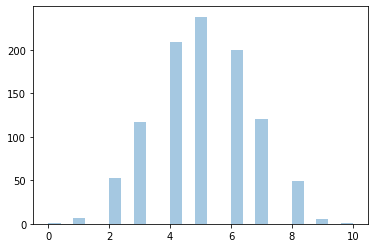

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# result of flipping a coin 10 times, tested 1000 times
print(random.binomial(n=10, p=0.5, size=100))
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()


## Normal Distribution (1/4)
***
 - Data can be "distributed" (spread out) in different ways
***
![](https://drive.google.com/uc?id=1CEZhkvwMLLoKH8mQU0OnHPk308XAgk2g)



## Normal Distribution (2/4)
***
 - But there are many cases where the data tends to be around a central value with no bias left or right, and it gets close to a "Normal Distribution" like this:
***
![](https://drive.google.com/uc?id=17DGqCkDqS6sG-PGfMiMi9bMVzGgtdEWL)



## Normal Distribution (3/4)
***
 - It is known as a "Bell Curve" because it literally looks like a bell
 
 - Many things closely follow a Normal Distribution:
    - heights of people
    - size of things produced by machines
    - errors in measurements
    - blood pressure
    - marks on a test


## Normal Distribution (4/4)
***
 - We say that the data is "Normally Distributed" 
 
 - The Normal Distribution has:
    - mean = median = mode
    - symmetry about the center
    - 50% of values less than the mean 
    - and 50% greater than the mean
    - The total area under the curve is 1.


## Normal Distribution
***

![](https://drive.google.com/uc?id=1o_GHb4HBInC10Oaqxto7_RdPCiLuSGvX)
 

## Normal Distributions and Standard Deviations
***
 - Yesterday we learnt about Standard Deviation and how it's the most commonly used measure of how spread out observations of our data are
 
 - When we calculate the standard deviation we find that (generally):
 
    - 68% of values are within 1 standard deviation	of the mean
    - 95% of values are within 2 standard deviations of the mean
    - 99.7% of values are within 3 standard deviations of the mean

![](https://drive.google.com/uc?id=1owmXwfu2cnAlOK0fiyBHLb4mrGGAJG55)


## Math behind the Normal Distribution
***
- So how do we get a Bell Curve? 
- As discussed before, there is a Statistical Function that describes it's shape, just like any other graph in Mathematics

 ***
![](https://drive.google.com/uc?id=1fWsoIcdeD0TPADHiWdXFZkZGX4KQRODl)

## Looking at House Price Data 
***
 - We know that John had the SalePrice data of the 1460 houses in Brooklyn
 
 - Let's plot a graph that shows us the SalePrice vs. the Frequency of that Price
 
 - Work it out in Python

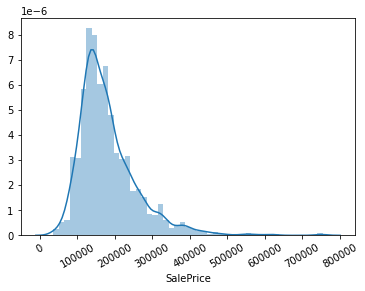

In [ ]:
plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])

## Thoughts 
***
The distribution is for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the left

 - This makes some sense since we already saw yesterday that we had a lot of Outliers on the upper-end of the Price scale
 
 - If you were to remove the outliers, it'd somewhat resemble a Normal Dstribution

## The Concept of Z-score (1/5)
***
 - The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score". Get used to those words!
 

## The Concept of Z-score (2/5)
***
- As usual, let's build our intution with an Example
    - Consider that we're analyzing data of the heights (in meters) of students in a school 
    - The data is normally distributed as shown below:
 ***
![](https://drive.google.com/uc?id=1pf8qZLg8x9kI2-BAP34n4ekaj2njXRGV)


## The Concept of Z-score (3/5)
***
 - We can see that the mean = 1.4 meters
 - In that same school one of your friends is 1.85m tall
 - You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4, so:
 - **Your friend's height has a "z-score" of 3.0**
 


## The Concept of Z-score (4/5)
***
 - It is also possible to calculate how many standard deviations 1.85 is from the mean
      - How far is 1.85 from the mean?
      - It is 1.85 - 1.4 = 0.45m from the mean
 
 - Say that the Std. Dev. is pre-calculated and is = 0.15m
 
 - How many standard deviations is is it from the mean? The standard deviation is 0.15m, so:

     - = 0.45m / 0.15m = 3 standard deviations

## The Concept of Z-score (5/5)
***
So to convert a value to a Standard Score ("z-score"):

 - first subtract the mean,
 - then divide by the Standard Deviation

And doing that is called "Standardizing":
 ***
![](https://drive.google.com/uc?id=1WEPJxkSWzvQ-OfD7bM-PulzSDKw49edX)


## In Class Activity
***
Example: Travel Time

A survey of daily travel time had these results (in minutes):

26, 33, 65, 28, 34, 55, 25, 44, 50, 36, 26, 37, 43, 62, 35, 38, 45, 32, 28, 34

Convert the values to z-scores ("standard scores").

Don't forget:
 ***
![](https://drive.google.com/uc?id=1BFQfTJgQJsv7xMEUb63ZpL8LPE3Orv8D)


In [ ]:
import statistics

time = [26, 33, 65, 28, 34, 55, 25, 44, 50, 36, 26, 37, 43, 62, 35, 38, 45, 32, 28, 34]

avg_time = sum(time)/len(time)
std_dev = statistics.stdev(time)
print(avg_time)
print(std_dev)

z_scores = [(x - avg_time) / std_dev for x in time]
print(z_scores)

38.8
11.696153213770756
[-1.0943769088908308, -0.49588953684115755, 2.24005273538592, -0.9233805168766385, -0.4103913408340614, 1.3850707753149583, -1.179875104897927, 0.44459061923690035, 0.9575797952794775, -0.23939494881986906, -1.0943769088908308, -0.15389675281277287, 0.35909242322980417, 1.9835581473646315, -0.32489314482696524, -0.06839855680567669, 0.5300888152439965, -0.5813877328482537, -0.9233805168766385, -0.4103913408340614]


## Activity 1
***
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.
We have, with us, more than 1000 data points. 

Find the probability of


*   the probability of `banking_crisis`
*   the probability of `systemic_crisis`
*   the probability of `banking_crisis` for `Egypt`.
*   the probability of `banking_crisis` given that `systemic_crisis`has already occurred
*   the probability of `banking_crisis` given that `inflation_crises`has already occurred
*   using the probabilities calculated above, and Bayes Theorem, find the probability of `systemic_crisis` given that `banking_crisis` has already occurred



In [ ]:
import pandas as pd

df = pd.read_csv("/content/data.csv")
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# Probability of banking_crisis

total = df.shape[0]
print(df['banking_crisis'].value_counts())
yes = df['banking_crisis'].value_counts()['crisis']
prob_banking = yes/total
print("The probability of banking_crisis is: ", prob)

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64
The probability of banking_crisis is:  0.07096774193548387


In [ ]:
# Probability of systemic_crisis

print(df['systemic_crisis'].value_counts())
yes = df['systemic_crisis'].value_counts()[1]
prob_systemic = yes/total
print("The probability of systemic_crisis is: ", prob)

0    977
1     82
Name: systemic_crisis, dtype: int64
The probability of systemic_crisis is:  0.07096774193548387


In [ ]:
# the probability of banking_crisis for Egypt.

total_Egypt = df[df['country'] == 'Egypt'].shape[0]
yes = df[df['country'] == 'Egypt']['banking_crisis'].value_counts()['crisis']
prob = yes/total_Egypt
print("The probability of banking_crisis for Egypt is: ", prob)

The probability of banking_crisis for Egypt is:  0.07096774193548387


In [ ]:
# The probability of banking_crisis given that systemic_crisis has already occurred

prob_1 = df[df['systemic_crisis']== 1]['banking_crisis'].value_counts()[0]/len(df[df['systemic_crisis']== 1])
print("The probability of banking_crisis given that systemic_crisishas already occurred: ", prob_1)

# the probability of banking_crisis given that inflation_criseshas already occurred
prob_2 = df[df['inflation_crises']== 1]['banking_crisis'].value_counts()[1]/len(df[df['inflation_crises']== 1])
print("The probability of banking_crisis given that inflation_crises has already occurred: ", prob_2)


The probability of banking_crisis given that systemic_crisishas already occurred:  0.926829268292683
The probability of banking_crisis given that inflation_crises has already occurred:  0.26277372262773724


In [ ]:
# the probability of systemic_crisis given that banking_crisis has already occurred

req_prob = prob_1 * prob_systemic / prob_banking
print("The probability of systemic_crisis given that banking_crisis has already occurred is: ", req_prob)

The probability of systemic_crisis given that banking_crisis has already occurred is:  0.8085106382978723


## Activity 2
***

In this task, we will further explore the House Price dataset (already stored in the `data` dataframe from above).
* Visualize the distribution of `LotArea`, `GrLivArea` and `GarageArea`. What can you say about their distribution?
* Define a new column `GrLivArea_z` that will store the z-scores of the column `GrLivArea`.



In [ ]:
data.head()

,Unnamed: 0,Id,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,GrLivArea,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SaleCondition,SalePrice
0,0,1,8450,CollgCr,1Fam,2Story,7,5,2003,GasA,1710,8,Attchd,2003.0,2,548,2008,Normal,208500
1,1,2,9600,Veenker,1Fam,1Story,6,8,1976,GasA,1262,6,Attchd,1976.0,2,460,2007,Normal,181500
2,2,3,11250,CollgCr,1Fam,2Story,7,5,2001,GasA,1786,6,Attchd,2001.0,2,608,2008,Normal,223500
3,3,4,9550,Crawfor,1Fam,2Story,7,5,1915,GasA,1717,7,Detchd,1998.0,3,642,2006,Abnorml,140000
4,4,5,14260,NoRidge,1Fam,2Story,8,5,2000,GasA,2198,9,Attchd,2000.0,3,836,2008,Normal,250000


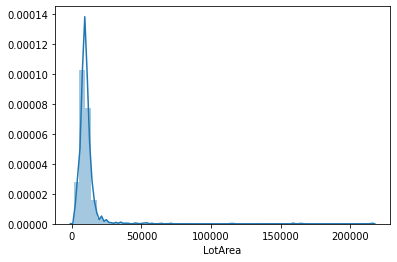

In [ ]:
sns.distplot(data['LotArea'])

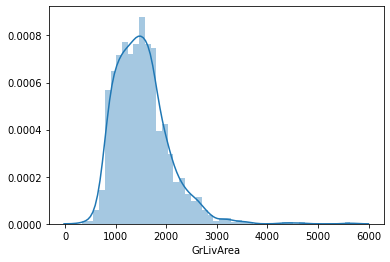

In [ ]:
sns.distplot(data['GrLivArea'])

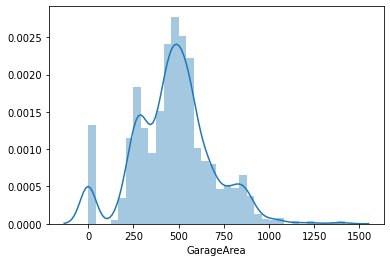

In [ ]:
sns.distplot(data['GarageArea'])

In [ ]:
data['GrLivArea_z'] = data['GrLivArea'].apply(lambda x: (x - data['GrLivArea'].mean())/data['GrLivArea'].std())

In [ ]:
data.head()

,Unnamed: 0,Id,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,GrLivArea,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SaleCondition,SalePrice,GrLivArea_z
0,0,1,8450,CollgCr,1Fam,2Story,7,5,2003,GasA,1710,8,Attchd,2003.0,2,548,2008,Normal,208500,0.370207
1,1,2,9600,Veenker,1Fam,1Story,6,8,1976,GasA,1262,6,Attchd,1976.0,2,460,2007,Normal,181500,-0.482347
2,2,3,11250,CollgCr,1Fam,2Story,7,5,2001,GasA,1786,6,Attchd,2001.0,2,608,2008,Normal,223500,0.514836
3,3,4,9550,Crawfor,1Fam,2Story,7,5,1915,GasA,1717,7,Detchd,1998.0,3,642,2006,Abnorml,140000,0.383528
4,4,5,14260,NoRidge,1Fam,2Story,8,5,2000,GasA,2198,9,Attchd,2000.0,3,836,2008,Normal,250000,1.298881
